 # Imports
 import torch

In [1]:
import torch
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('ieee')

In [3]:
import transformers
import torch

from transformers import LlamaForCausalLM, LlamaTokenizer

/home/seyed/miniconda3/envs/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B"

pipeline = transformers.pipeline("text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto")
pipeline("Hey how are you doing today?")

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
401 Client Error. (Request ID: Root=1-662a7f4c-0cb1a4b54c068c9f1759a75f;d1e8ca14-0be6-4b25-8c59-e19fdc4ec69c)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Access to model meta-llama/Meta-Llama-3-8B is restricted. You must be authenticated to access it.

In [66]:
import pandas as pd

llm_df = \
pd.DataFrame([
[7.71],
[6.84],
[9.60],
[9.01],
[6.84],
[6.89],
[6.20],
[5.48],
[5.62],
[5.30],
[5.33],
[5.31],
[5.29],
[5.22],
[4.94],
[4.90],
[4.86]]
)

In [71]:
import numpy as np
llm_df_transf = pd.concat(
     [
     llm_df - np.abs(np.random.normal(0, 0.1, llm_df.shape)),
     llm_df,
     llm_df + 2 * np.abs(np.random.normal(0, 0.4, llm_df.shape)),
     llm_df + 0.3,
     ], axis=1)
llm_df_transf.to_csv("results/llm_df_transf.csv")

In [72]:
llm_df_transf.columns = ["fully-finetune", "LoRA", "Top^2", "Strada-LLM[Solo]",]
new_index = {ind: val for ind, val in enumerate([10, 15, 20, 25, 30, 35, 40,45, 50, 55, 60, 65, 70, 75, 80, 90, 100])}
df_renamed = llm_df_transf.rename(index=new_index)

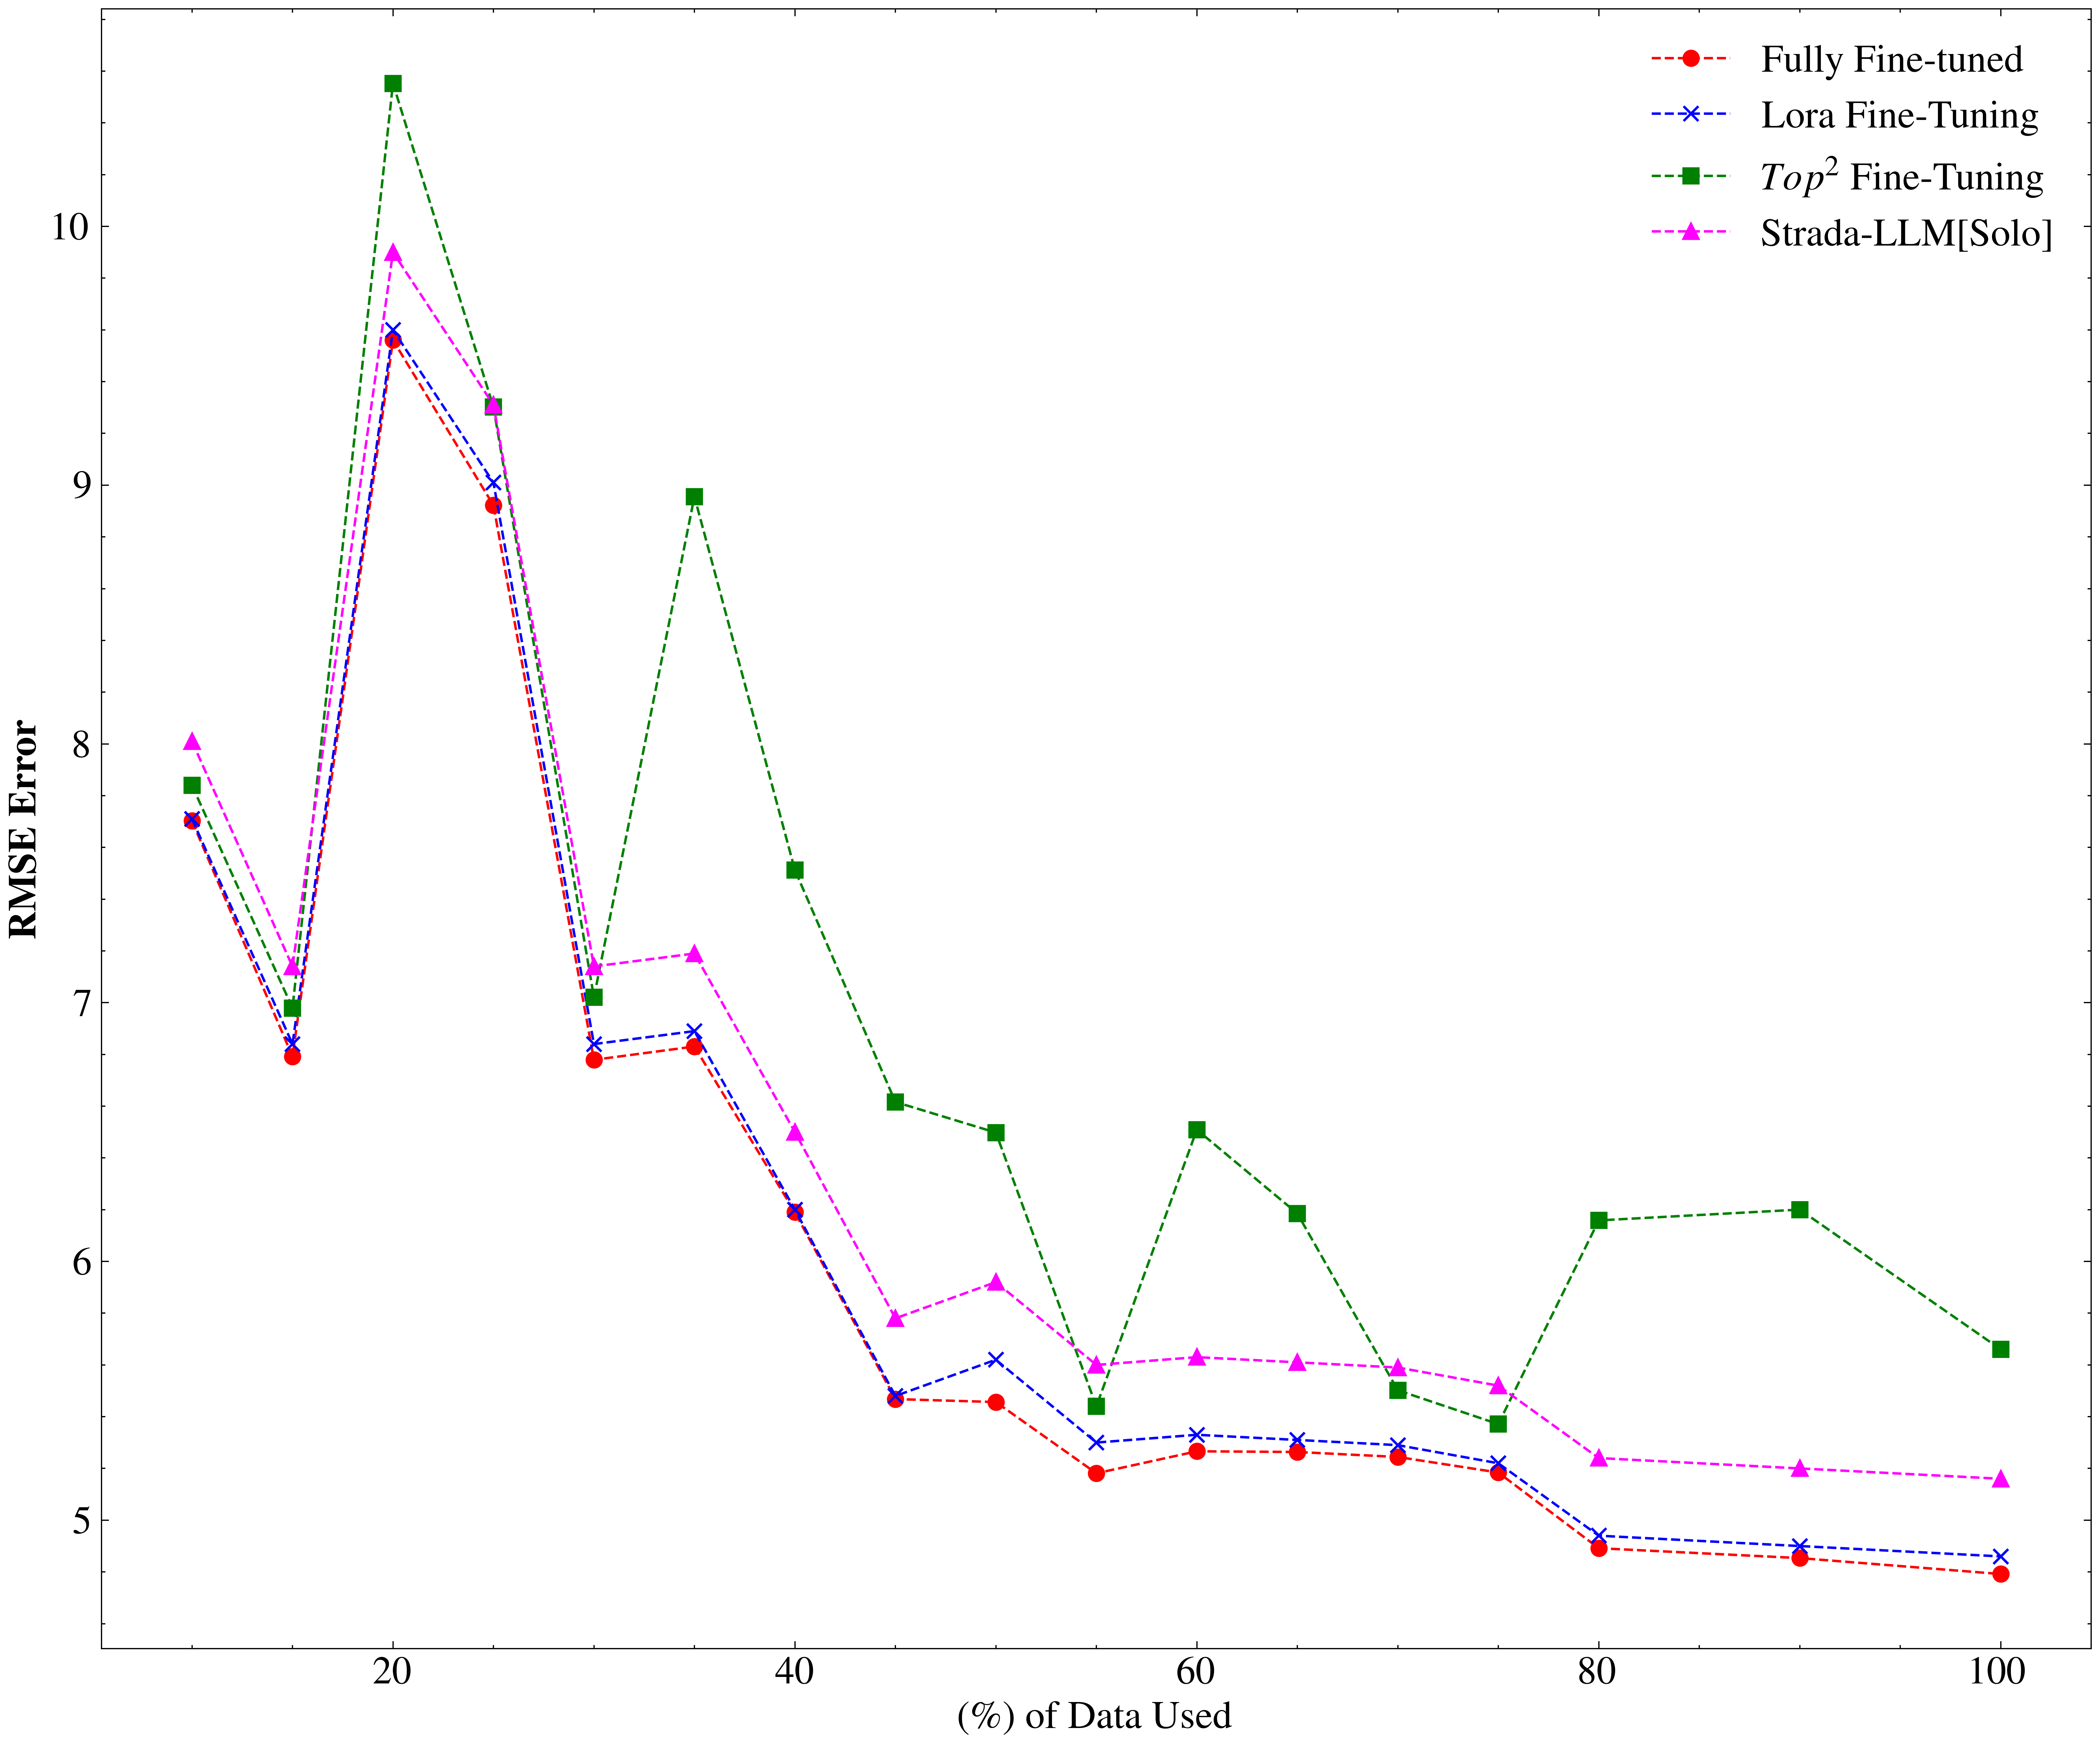

In [74]:
# Data
# x = [1, 2, 3, 4, 5]
# y1 = [2, 3, 5, 7, 11]
# y2 = [1, 4, 9, 16, 25]
# y3 = [0, 1, 4, 9, 16]

# Create figure and axes
fig, axs = plt.subplots(figsize=(12, 10))

# Plot 1 - Dots with dashed lines
plt.plot(df_renamed.index, df_renamed["fully-finetune"], color='red', marker='o', linestyle='--', label='Fully Fine-tuned')
# axs[0].set_title('Plot with Dots and Dashed Lines')
# axs[0].legend()

# Plot 2 - Crosses with dashed lines
plt.plot(df_renamed.index, df_renamed["LoRA"], color='blue', marker='x', linestyle='--', label='Lora Fine-Tuning')
# axs[1].set_title('Plot with Crosses and Dashed Lines')
# axs[1].legend()

# Plot 3 - Squares with dashed lines
plt.plot(df_renamed.index, df_renamed["Top^2"], color='green', marker='s', linestyle='--', label='$Top^2$ Fine-Tuning')

plt.plot(df_renamed.index, df_renamed["Strada-LLM[Solo]"], color='magenta', marker='^', linestyle='--', label='Strada-LLM[Solo]')
# plt.axhline(y=9.01, color='black', linestyle='-.', linewidth=3, label='Zero-shot')
# plt.axhline(y=4.86, color='black', linestyle='-.', linewidth=3)
plt.xlabel('(\%) of Data Used', fontsize=16)
plt.ylabel(r'\textbf{RMSE Error}', fontsize=16)
# plt.yscale('log')
# axs[2].set_title('Plot with Squares and Dashed Lines')
# axs[2].legend()
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

In [7]:

df = pd.DataFrame(
    [[76.12, 84.35, 73.54, 82.98, 33.47, 40.08, 86.14, 103.15],
[59.46, 47.28, 57.35, 45.48, 45.51, 54.96, 35.29, 42.82],
[55.64, 60.42, 47.65, 57.89, 39.85, 49.08, 31.26, 37.72],
[51.37, 58.26, 41.37, 50.75, 31.53, 38.79, 27.19, 33.11],
[45.62, 52.36, 39.56, 47.95, 24.63, 30.09, 24.29, 31.19],
[35.53, 37.52, 29.64, 32.37, 25.26, 30.50, 22.55, 27.56],
[22.68, 28.85, 22.59, 27.93, 22.10, 27.04, 21.94, 26.93],
[22.52, 28.76, 22.36, 27.62, 21.18, 26.31, 20.51, 26.01],
[22.36, 28.72, 22.12, 27.58, 20.41, 26.43, 19.26, 25.47]]
)



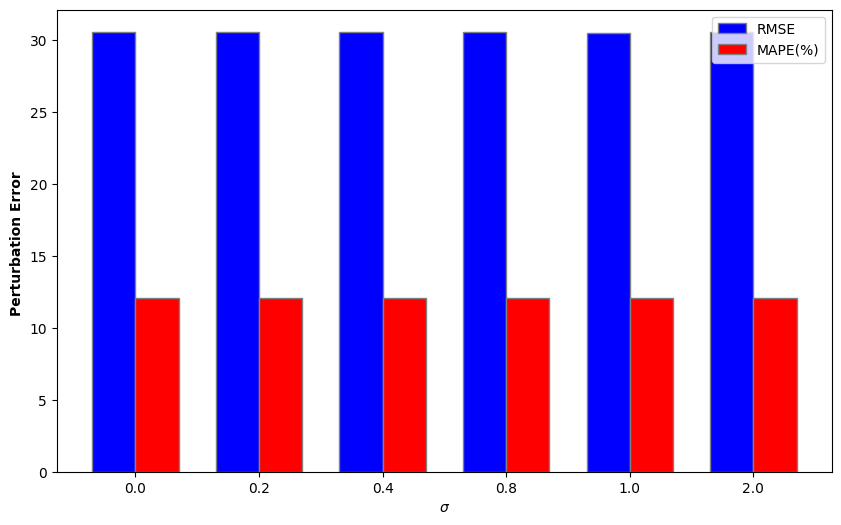

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': [0, 0.2, 0.4, 0.8, 1, 2],
    'RMSE': [30.57, 30.58, 30.56, 30.56, 30.54, 30.60],
    'MAPE': [12.09, 12.09, 12.09, 12.08, 12.08, 12.10]
}

df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(r1, df['RMSE'], color='blue', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r2, df['MAPE'], color='red', width=bar_width, edgecolor='grey', label='MAPE(%)')

# Add labels
plt.xlabel('$\sigma$', fontweight='bold')
plt.ylabel('Perturbation Error ', fontweight='bold')
# plt.title('Multi-Bar Chart Example', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width / 2 for r in range(len(df))], df['Category'])

# Add the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd

data1 = {
    '0.2': [17.34, 17.31, 18.04],
    '30': [18.12, 18.10, 18.91],
    '60': [19.27, 19.26, 19.73],
}
data2 = {
    '15':  [28.44, 23.96, 27.67],
    '30':  [29.81, 24.86, 29.41],
    '60': [31.33, 25.47, 30.57]
}
data3 = {
    '15': [11.57, 10.36, 10.92],
    '30': [12.00, 10.85, 11.36],
    '60': [12.78, 11.10, 12.09]
}


In [2]:
import pandas as pd

data1 = {
    '15': [17.34, 17.31, 18.04],
    '30': [18.12, 18.10, 18.91],
    '60': [19.27, 19.26, 19.73],
}
data2 = {
    '15':  [28.44, 23.96, 27.67],
    '30':  [29.81, 24.86, 29.41],
    '60': [31.33, 25.47, 30.57]
}
data3 = {
    '15': [11.57, 10.36, 10.92],
    '30': [12.00, 10.85, 11.36],
    '60': [12.78, 11.10, 12.09]
}
data4 = {
    # "Epochs": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    "FlashST": [9.21, 8.97, 8.24, 7.25, 5.25, 5.23, 5.20, 5.21, 5.19, 5.18, 5.20, 5.17, 5.22, 5.19, 5.18],
    "Strada-LLM": [9.11,8.77, 8.03, 6.05, 5.73, 5.25,  4.86, 4.63, 4.64, 4.61, 4.62, 4.60, 4.62, 4.61, 4.63]
}

index = ['STEP', 'Ours(solo)', 'Ours(Foundational)']
df = pd.DataFrame(data1)
df = df.rename(index={0:"STEP", 1:index[1], 2:index[2]})

index = ['STEP', 'Ours(solo)', 'Ours(Foundational)']
df2 = pd.DataFrame(data2)
df2 = df2.rename(index={0:"STEP", 1:index[1], 2:index[2]})

index = ['STEP', 'Ours(solo)', 'Ours(Foundational)']
df3 = pd.DataFrame(data3)
df3 = df3.rename(index={0:"STEP", 1:index[1], 2:index[2]})

index = ['FlashST', 'Strada-LLM(ours)']
df4 = pd.DataFrame(data4)
# df4 = df4.rename(index={0:"Epochs", 1:index[0], 2:index[1]})

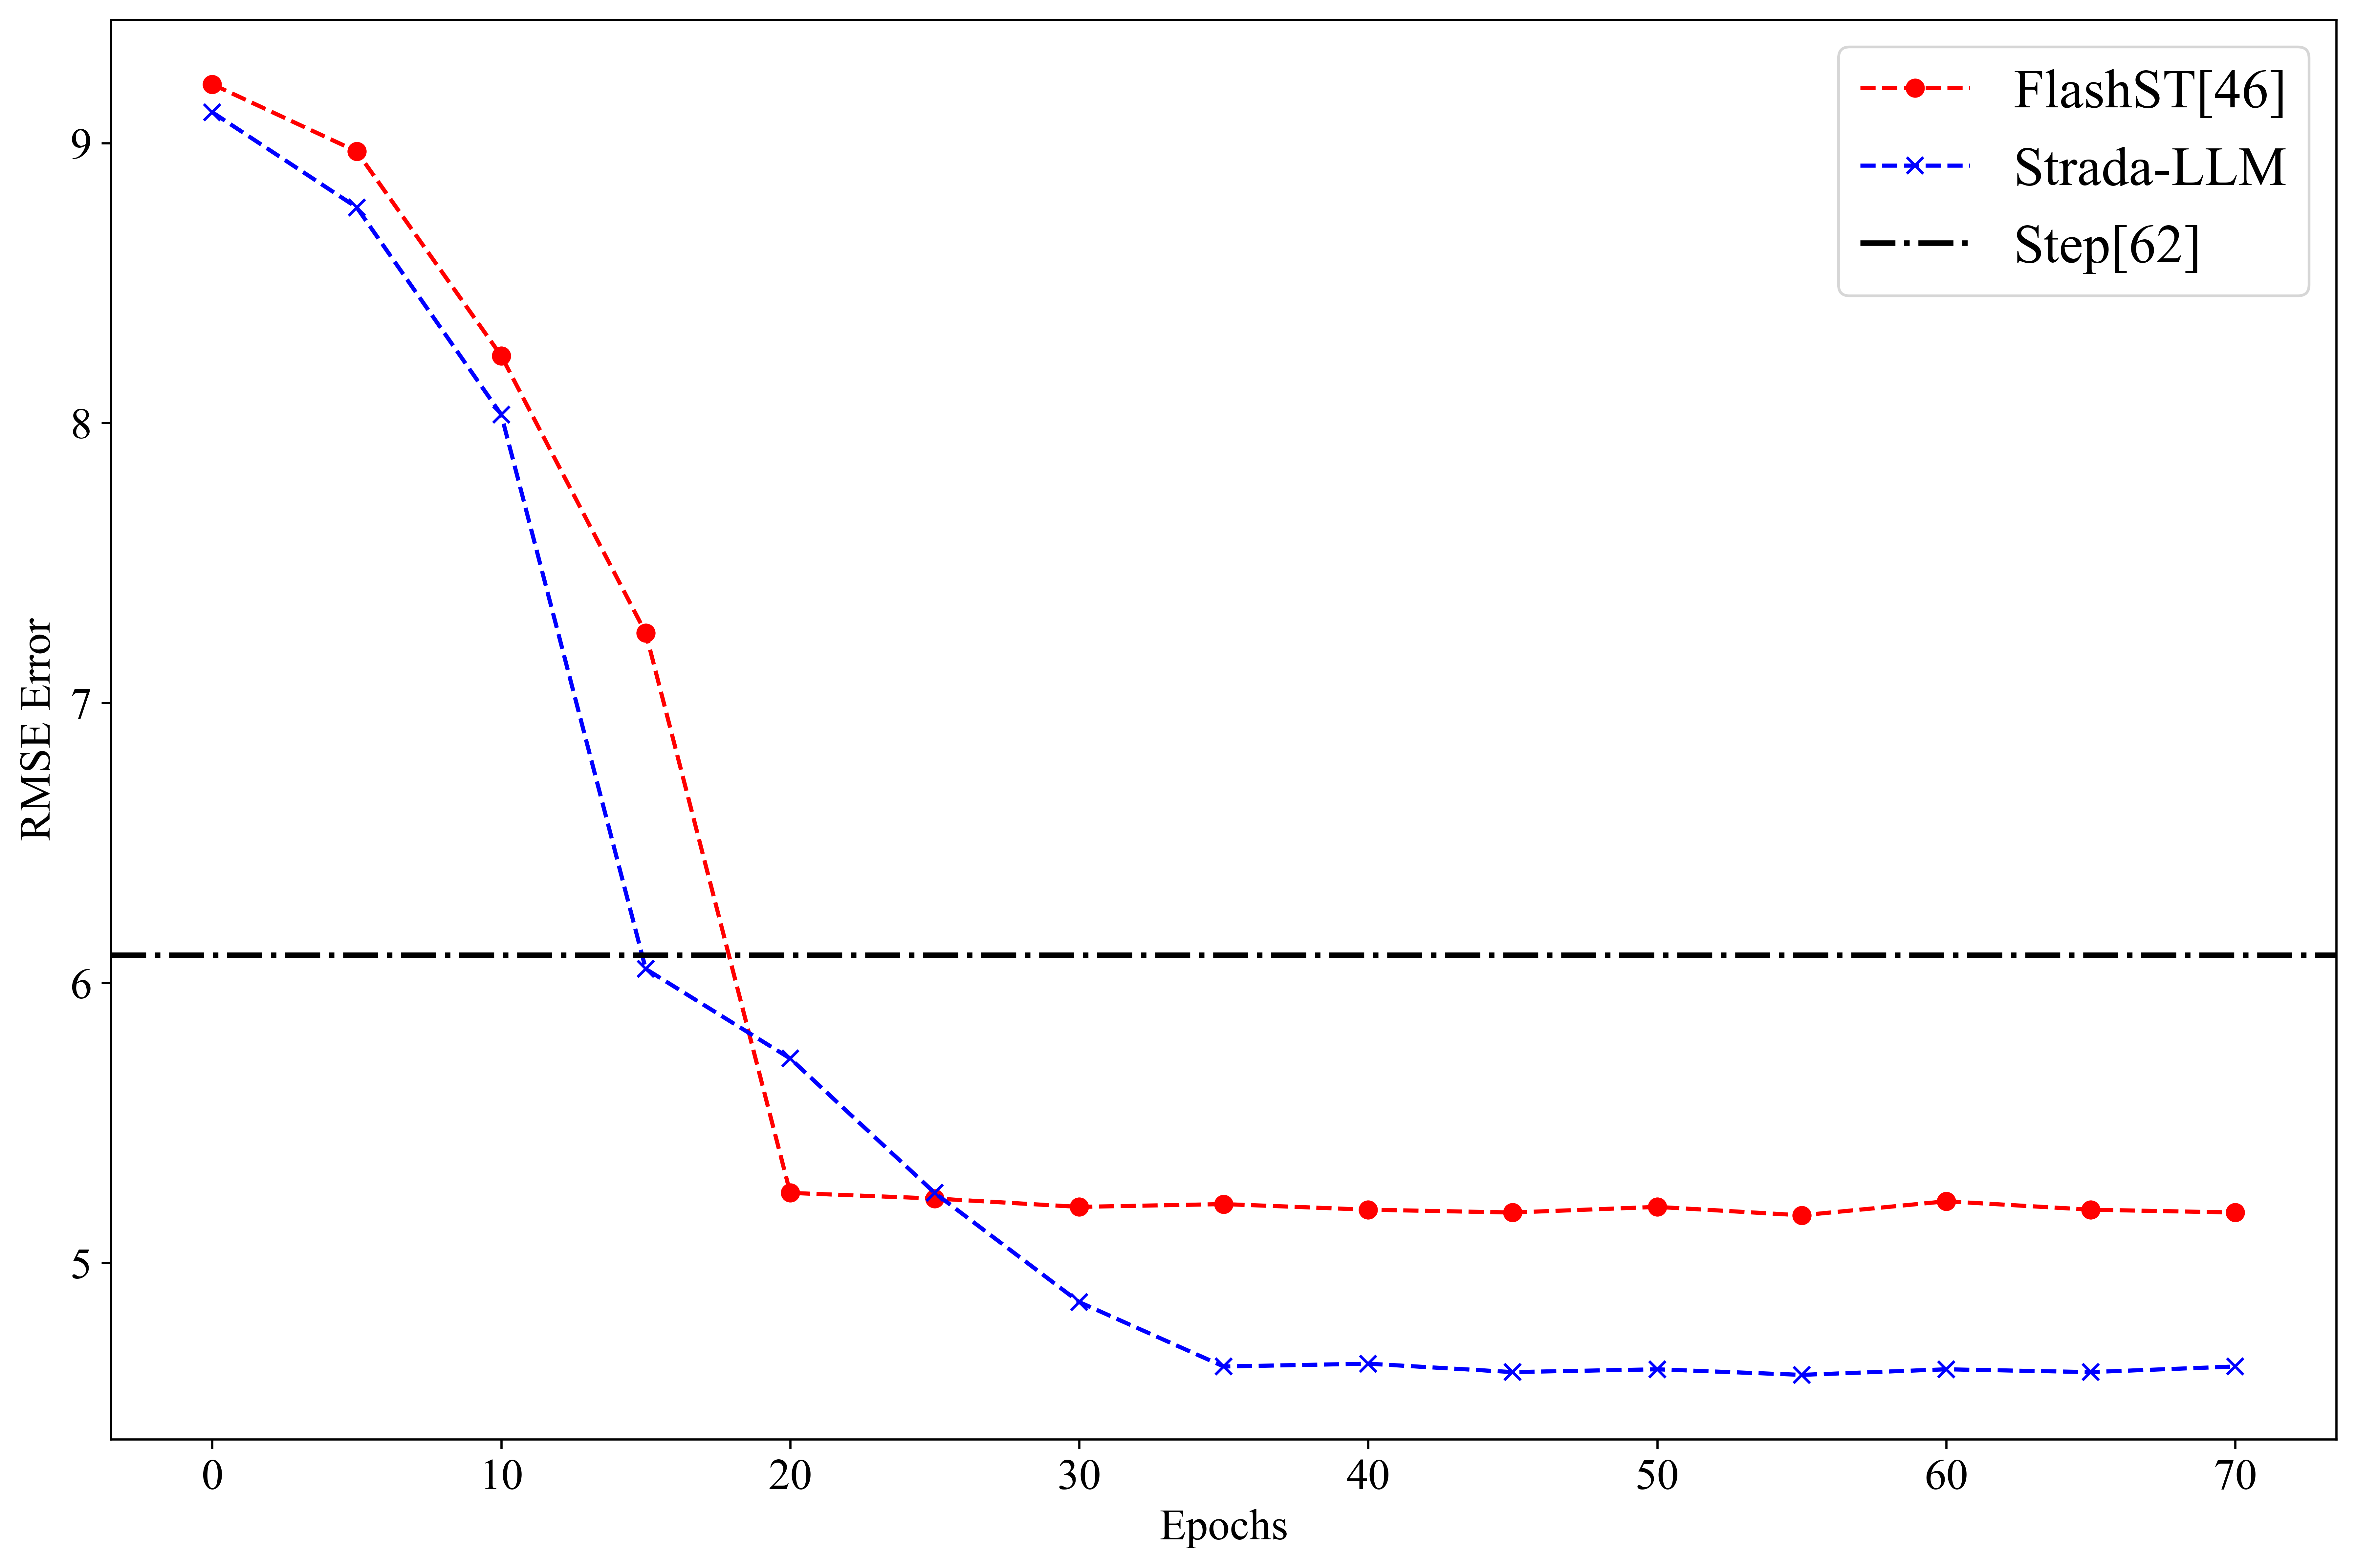

In [5]:
# import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# Data
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 9, 16, 25]
y3 = [0, 1, 4, 9, 16]

# Create figure and axes

df4.columns = ["FlashST", "Strada-LLM"]
new_index = {ind: val for ind, val in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])}
df_renamed = df4.rename(index=new_index)

fig, axs = plt.subplots(figsize=(12, 8))

# Plot 1 - Dots with dashed lines
plt.plot(df_renamed.index, df_renamed["FlashST"], color='red', marker='o', linestyle='--', label='FlashST[46]')
# axs[0].set_title('Plot with Dots and Dashed Lines')
# axs[0].legend()

# Plot 2 - Crosses with dashed lines
plt.plot(df_renamed.index, df_renamed["Strada-LLM"], color='blue', marker='x', linestyle='--', label='Strada-LLM')
# axs[1].set_title('Plot with Crosses and Dashed Lines')
# axs[1].legend()

plt.axhline(y=6.10, color='black', linestyle='-.', linewidth=2, label="Step[62]")
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('RMSE Error', fontsize=16)
# axs[2].set_title('Plot with Squares and Dashed Lines')
# axs[2].legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()


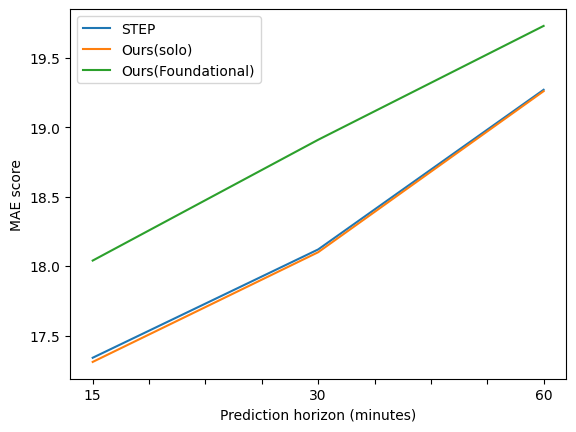

In [2]:
import matplotlib.pyplot as plt

ax = df.T.plot()
ax.set_xlabel("Prediction horizon (minutes)")
ax.set_ylabel("MAE score")
plt.show()

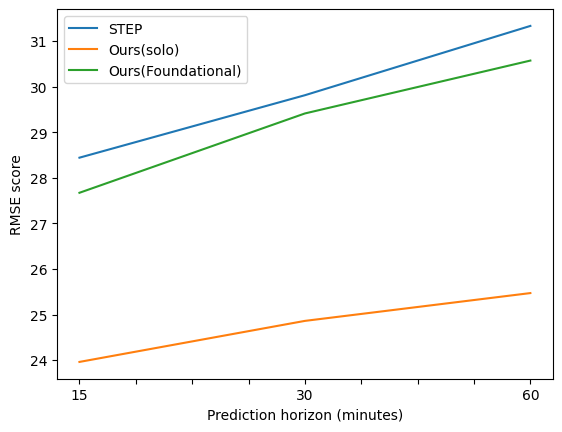

In [3]:
ax = df2.T.plot()
ax.set_xlabel("Prediction horizon (minutes)")
ax.set_ylabel("RMSE score")
plt.show()

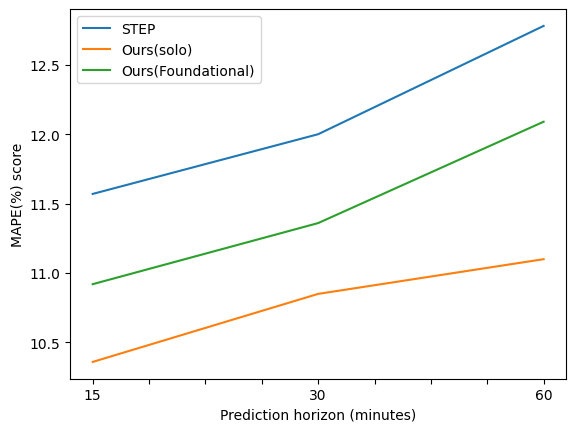

In [4]:
ax = df3.T.plot()
ax.set_xlabel("Prediction horizon (minutes)")
ax.set_ylabel("MAPE(%) score")
plt.show()

In [9]:
ndf = df.T

In [14]:
df.columns = ["top2_mae", "top2_rmse", "lora_mae", "lora_rmse", "fully_mae", "fully_rmse", "supervised_mae", "supervised_rmse"]
new_index = {ind: val for ind, val in enumerate([2,5,10,15,30, 50, 60, 90, 100])}
df_renamed = df.rename(index=new_index)

In [15]:
df_renamed

,top2_mae,top2_rmse,lora_mae,lora_rmse,fully_mae,fully_rmse,supervised_mae,supervised_rmse
2,76.12,84.35,73.54,82.98,33.47,40.08,86.14,103.15
5,59.46,47.28,57.35,45.48,45.51,54.96,35.29,42.82
10,55.64,60.42,47.65,57.89,39.85,49.08,31.26,37.72
15,51.37,58.26,41.37,50.75,31.53,38.79,27.19,33.11
30,45.62,52.36,39.56,47.95,24.63,30.09,24.29,31.19
50,35.53,37.52,29.64,32.37,25.26,30.50,22.55,27.56
60,22.68,28.85,22.59,27.93,22.10,27.04,21.94,26.93
90,22.52,28.76,22.36,27.62,21.18,26.31,20.51,26.01
100,22.36,28.72,22.12,27.58,20.41,26.43,19.26,25.47


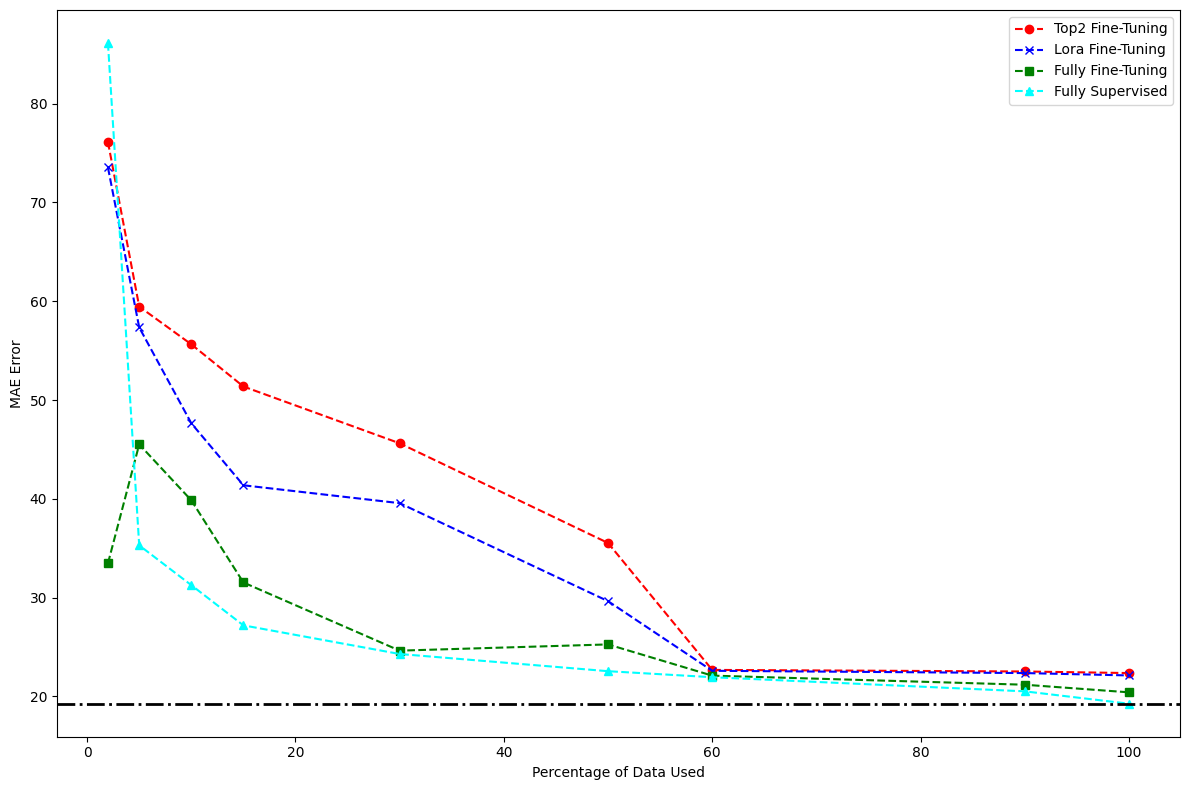

In [23]:
import matplotlib.pyplot as plt

# Data
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 9, 16, 25]
y3 = [0, 1, 4, 9, 16]

# Create figure and axes
fig, axs = plt.subplots(figsize=(12, 8))

# Plot 1 - Dots with dashed lines
plt.plot(df_renamed.index, df_renamed["top2_mae"], color='red', marker='o', linestyle='--', label='Top2 Fine-Tuning')
# axs[0].set_title('Plot with Dots and Dashed Lines')
# axs[0].legend()

# Plot 2 - Crosses with dashed lines
plt.plot(df_renamed.index, df_renamed["lora_mae"], color='blue', marker='x', linestyle='--', label='Lora Fine-Tuning')
# axs[1].set_title('Plot with Crosses and Dashed Lines')
# axs[1].legend()

# Plot 3 - Squares with dashed lines
plt.plot(df_renamed.index, df_renamed["fully_mae"], color='green', marker='s', linestyle='--', label='Fully Fine-Tuning')

plt.plot(df_renamed.index, df_renamed["supervised_mae"], color='cyan', marker='^', linestyle='--', label='Fully Supervised')
plt.axhline(y=19.26, color='black', linestyle='-.', linewidth=2)
plt.xlabel('Percentage of Data Used')
plt.ylabel('MAE Error')
# axs[2].set_title('Plot with Squares and Dashed Lines')
# axs[2].legend()
plt.legend()
plt.tight_layout()
plt.show()


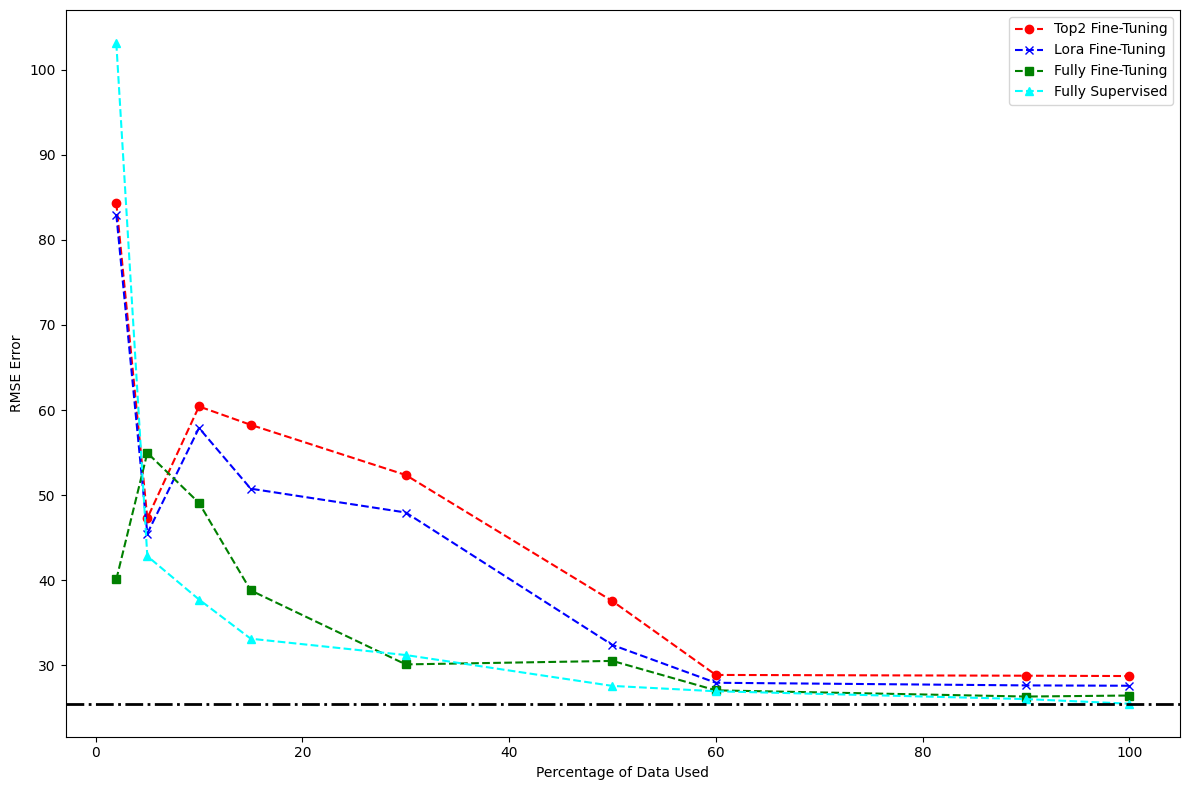

In [25]:
# Create figure and axes
fig, axs = plt.subplots(figsize=(12, 8))

# Plot 1 - Dots with dashed lines
plt.plot(df_renamed.index, df_renamed["top2_rmse"], color='red', marker='o', linestyle='--', label='Top2 Fine-Tuning')
# axs[0].set_title('Plot with Dots and Dashed Lines')
# axs[0].legend()

# Plot 2 - Crosses with dashed lines
plt.plot(df_renamed.index, df_renamed["lora_rmse"], color='blue', marker='x', linestyle='--', label='Lora Fine-Tuning')
# axs[1].set_title('Plot with Crosses and Dashed Lines')
# axs[1].legend()

# Plot 3 - Squares with dashed lines
plt.plot(df_renamed.index, df_renamed["fully_rmse"], color='green', marker='s', linestyle='--', label='Fully Fine-Tuning')

plt.plot(df_renamed.index, df_renamed["supervised_rmse"], color='cyan', marker='^', linestyle='--', label='Fully Supervised')
plt.axhline(y=25.47, color='black', linestyle='-.', linewidth=2)
plt.xlabel('Percentage of Data Used')
plt.ylabel('RMSE Error')
# axs[2].set_title('Plot with Squares and Dashed Lines')
# axs[2].legend()
plt.legend()
plt.tight_layout()
plt.show()


Level 1 coefficients: (66,)
Level 2 coefficients: (66,)
Level 3 coefficients: (130,)
Level 4 coefficients: (258,)
Level 5 coefficients: (513,)


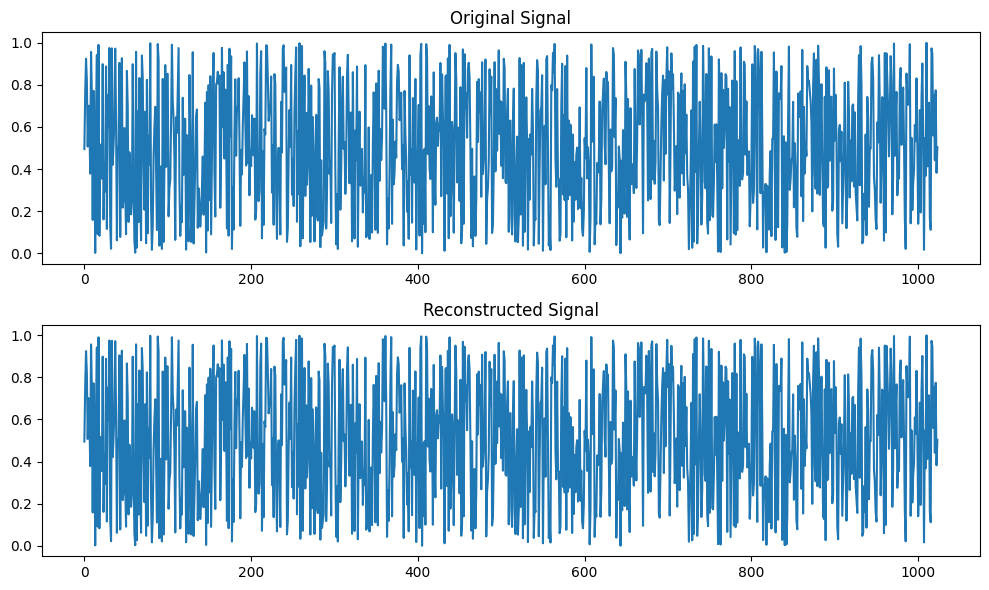

In [2]:
import pywt
import numpy as np

# Generate some sample data
data = np.random.rand(1024)

# Choose a wavelet family and level of decomposition
wavelet = 'db2'  # Daubechies wavelet family, 2nd order
level = 4  # Level of decomposition

# Perform wavelet transform
coeffs = pywt.wavedec(data, wavelet, level=level)

# Reconstruction (optional)
reconstructed_data = pywt.waverec(coeffs, wavelet)

# Analysis of coefficients
for i in range(len(coeffs)):
    print(f"Level {i+1} coefficients:", coeffs[i].shape)

# Plot the original and reconstructed signals (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(data)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_data)
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()

In [3]:
import torch

# Set the random seed for reproducibility
torch.manual_seed(42)

# Define the rate parameter (lambda) for the Poisson distribution
rate = 3.0

# Generate a tensor of Poisson random noise with the given rate
poisson_noise = torch.poisson(rate * torch.ones(5, 5))

print(torch.nn.BatchNorm2d(1)(poisson_noise))

ValueError: expected 4D input (got 2D input)

In [12]:
poisson_noise/poisson_noise.max()

tensor([[0.2000, 0.2000, 0.8000, 0.2000, 1.0000],
        [0.6000, 0.6000, 0.0000, 0.4000, 0.2000],
        [0.4000, 0.6000, 0.6000, 0.8000, 0.4000],
        [0.4000, 0.8000, 0.4000, 0.6000, 0.8000],
        [0.6000, 0.2000, 0.6000, 0.6000, 0.8000]])

In [13]:
sum([0.2000, 0.2000, 0.8000, 0.2000, 1.0000])

2.4000000000000004

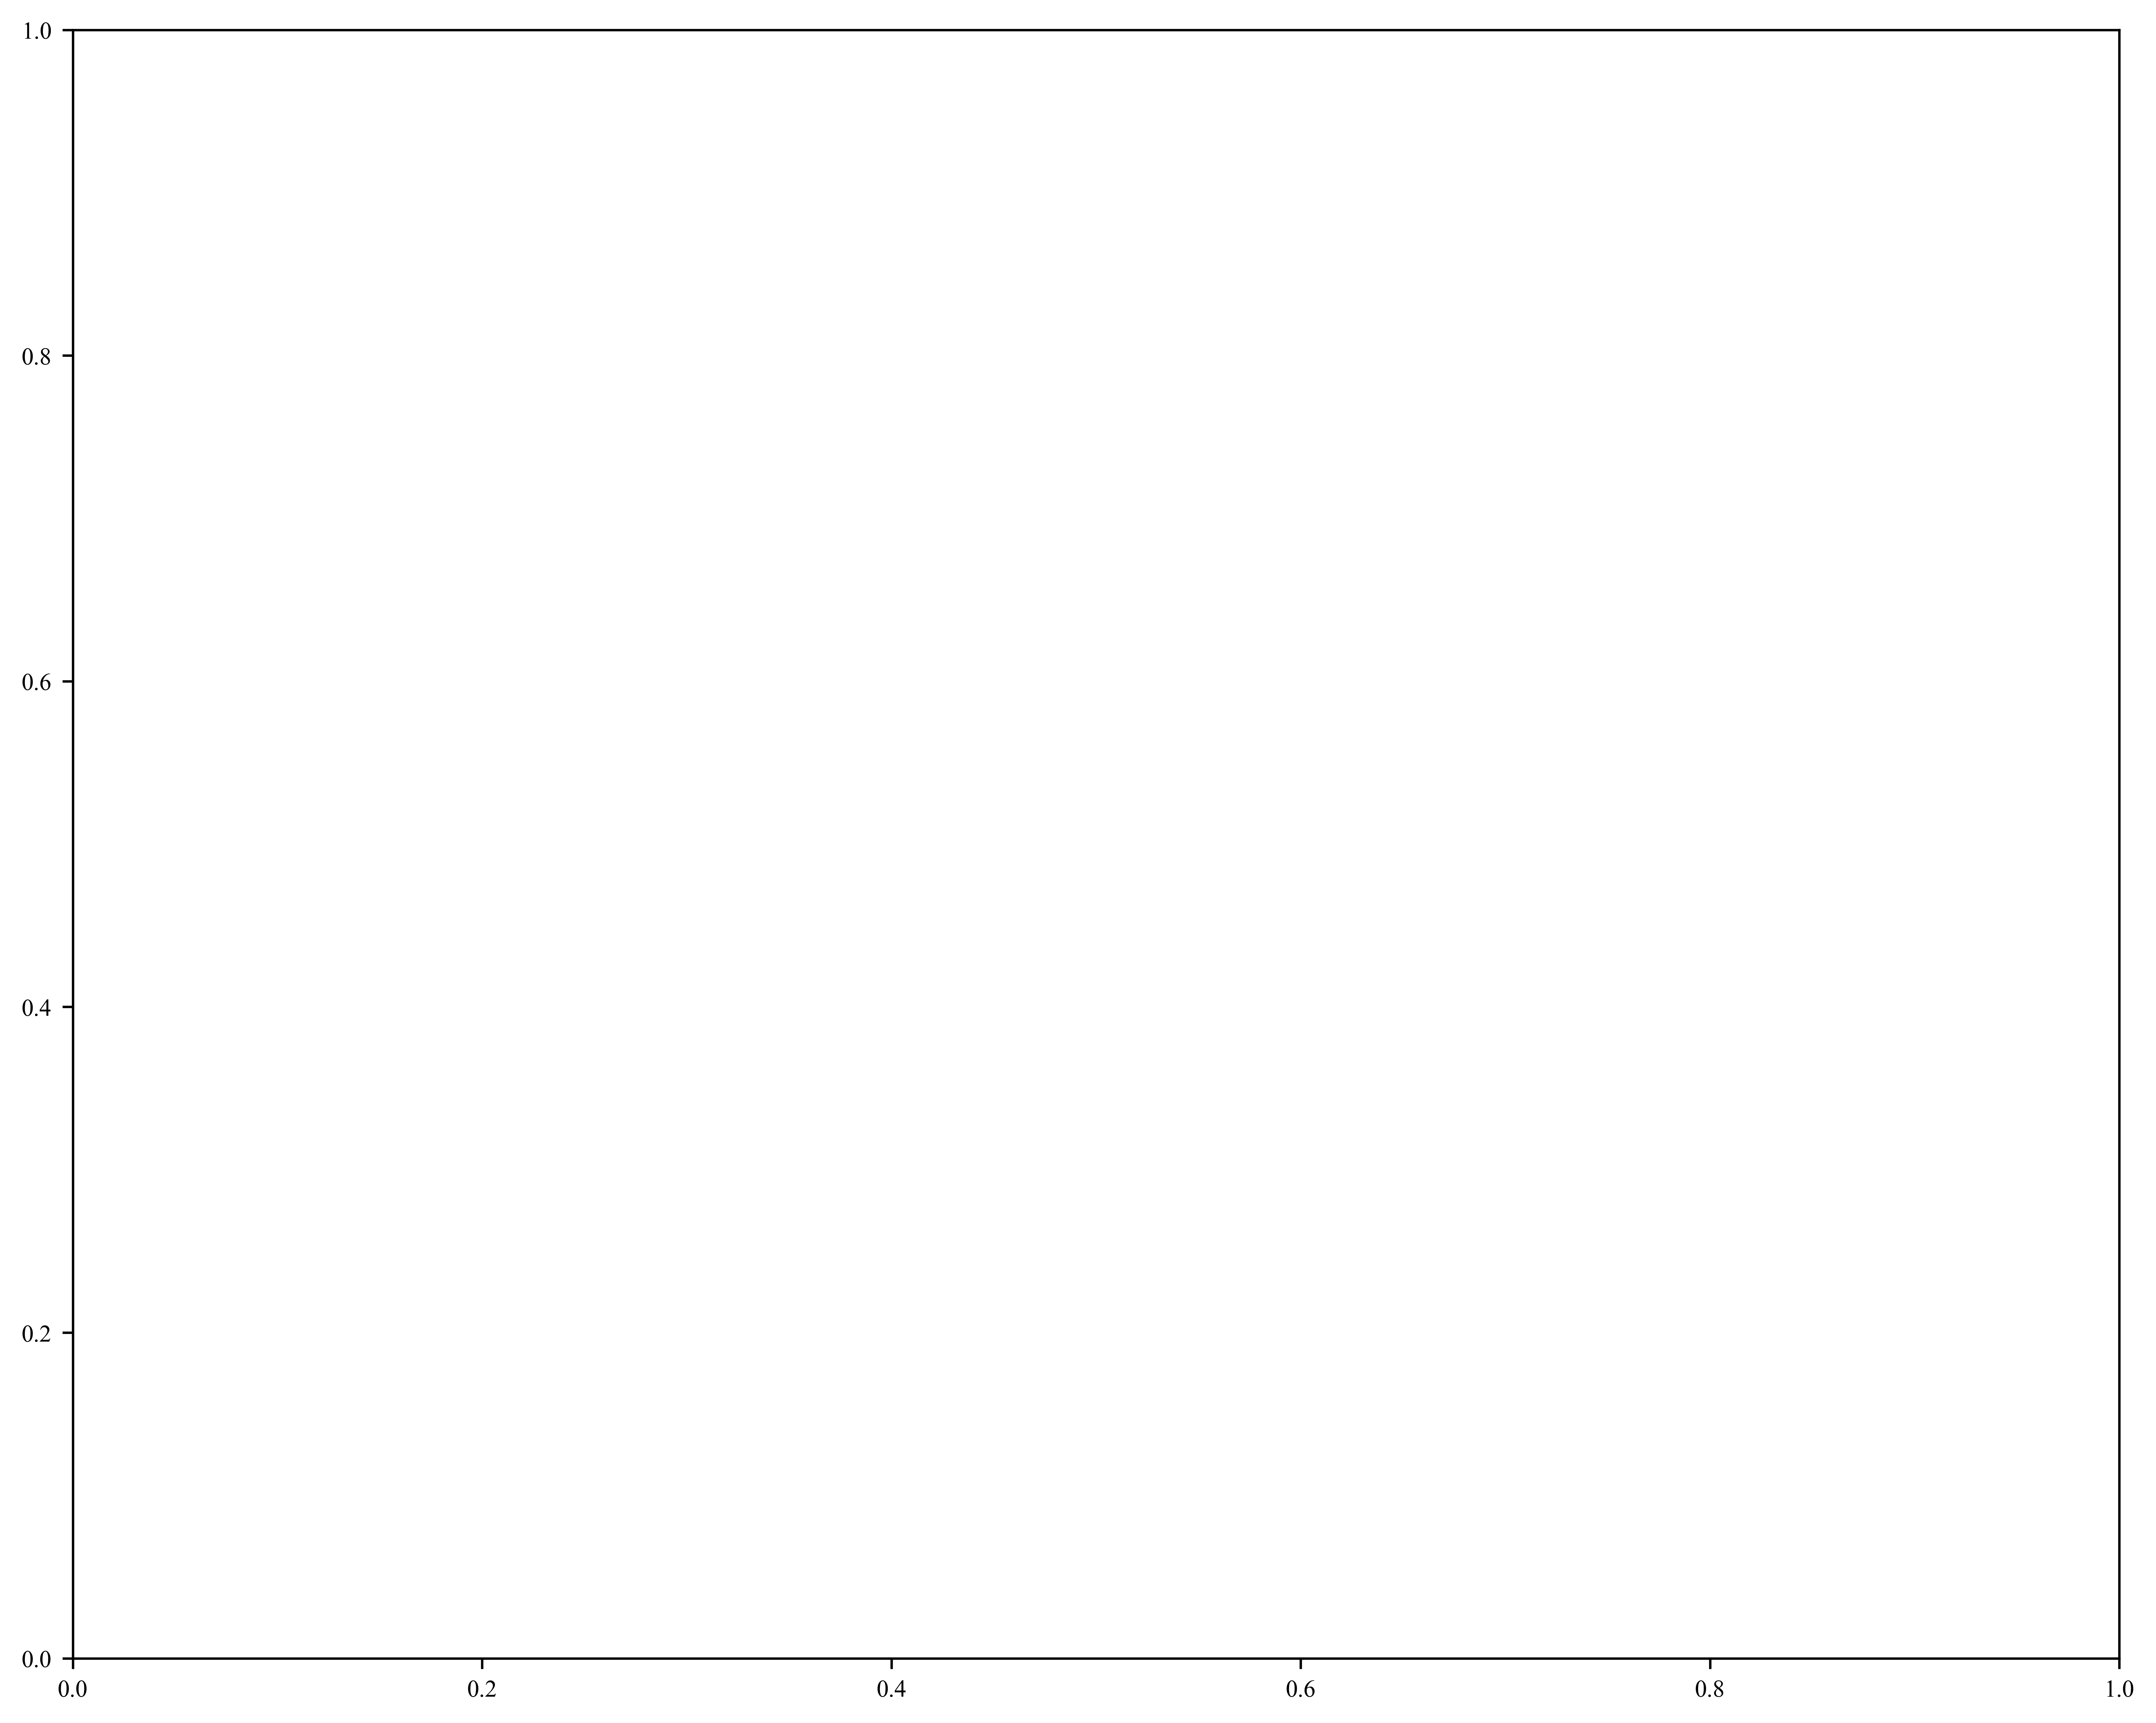

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Create a graph
G = nx.DiGraph()

# Number of nodes
num_nodes = 10

# Add nodes
for i in range(num_nodes):
    G.add_node(i)

# Function to add a random transaction
def add_transaction():
    sender = random.randint(0, num_nodes-1)
    receiver = random.randint(0, num_nodes-1)
    while receiver == sender:
        receiver = random.randint(0, num_nodes-1)
        print(sender, receiver)
        G.add_edge(sender, receiver)

# Initialize plot
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(10, 8))

# Animation update function
def update(frame):
    ax.clear()
    add_transaction()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=500, font_size=10, font_weight='bold', 
            arrows=True, ax=ax)
    ax.set_title(f"Blockchain Transactions (Frame {frame+1})")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=1, repeat=False)

plt.tight_layout()
plt.show()

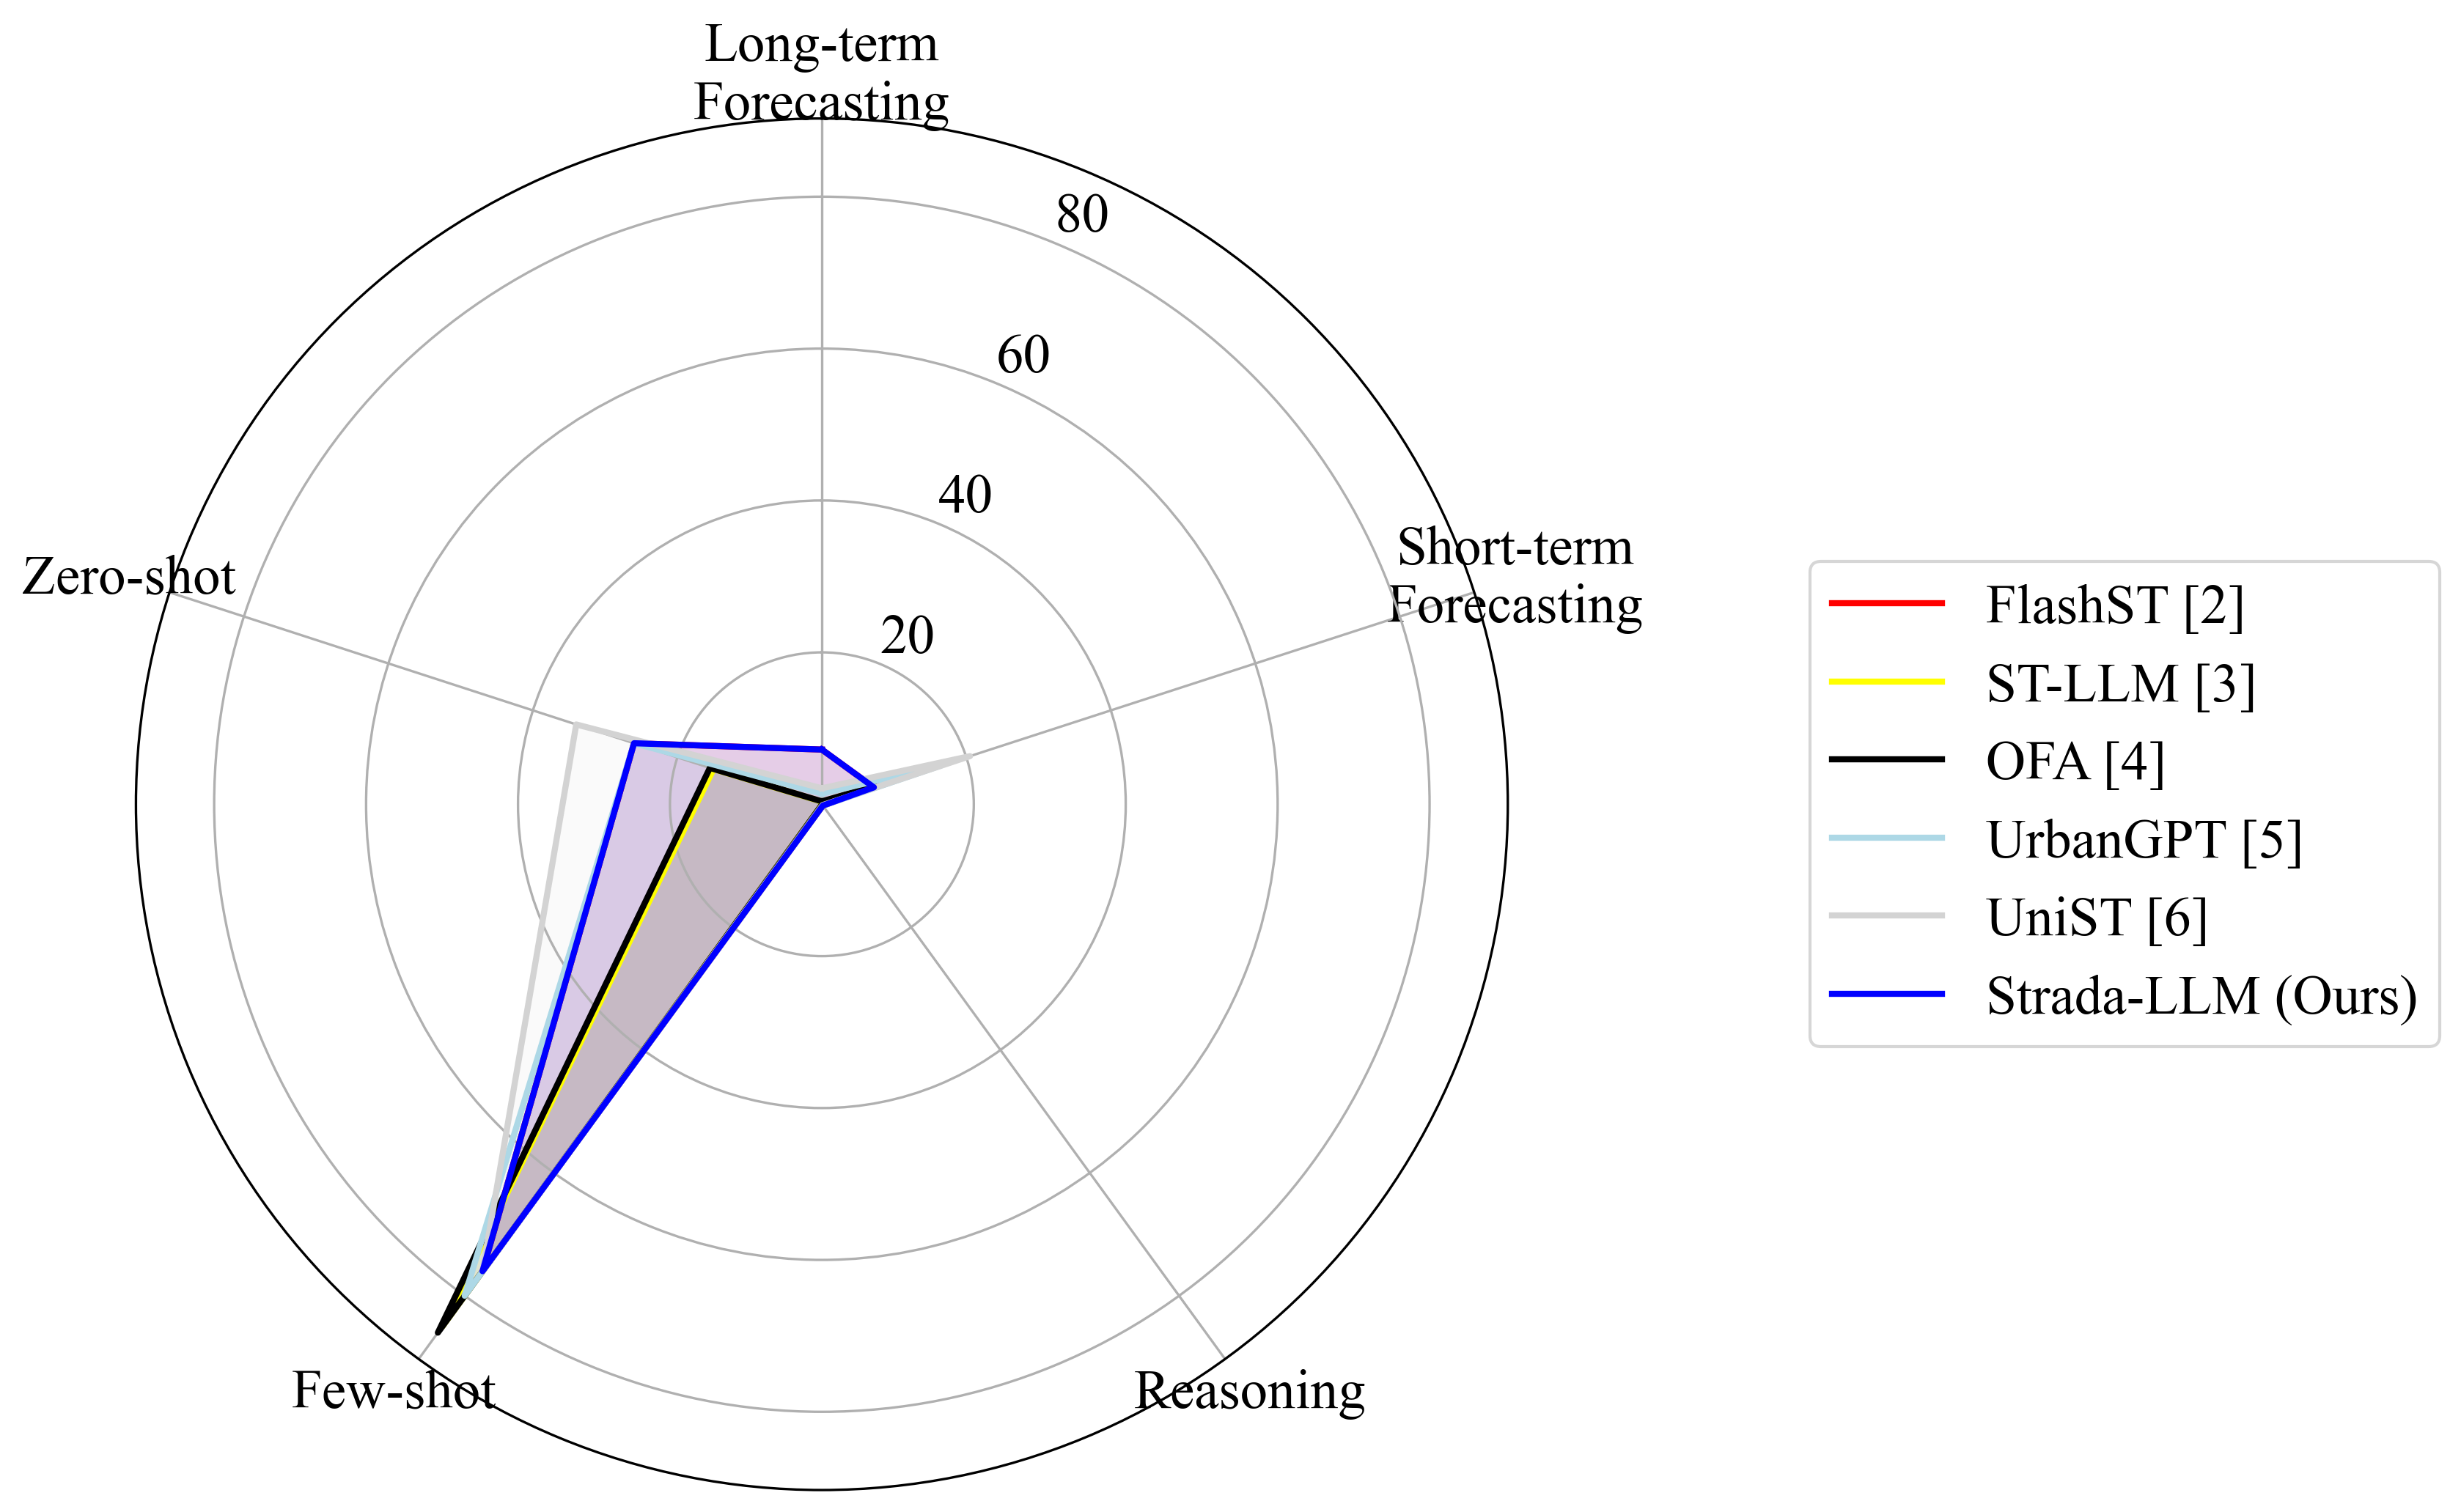

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data
# Set Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 18
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

categories = ['Long-term\nForecasting', 'Short-term\nForecasting', 'Reasoning',  'Few-shot', 'Zero-shot']

# Values for each model
models = {
    'FlashST [2]':       [7.20, 7.20, 0.22, 76.00, 26.00],
    'ST-LLM [3]':    [0.35, 11.00, 0.04, 85.00, 15.00],
    'OFA [4] ':     [0.38, 11.20, 0.04, 86.00, 15.50],
    'UrbanGPT [5]':    [1.40, 16.50, 0.22, 80.00, 26.00],
    'UniST [6]':      [2.10, 20.50, 0.14, 76.00, 34.00],
    'Strada-LLM (Ours)':      [7.20, 7.20, 0.22, 76.00, 26.00]
}

# Colors for each model
colors = ['red', 'yellow', 'black', 'lightblue', 'lightgrey', 'blue']

# Set up the angles for each category
num_cats = len(categories)
angles = [n / float(num_cats) * 2 * np.pi for n in range(num_cats)]
angles += angles[:1]  # Complete the circle

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Plot each model
for model, values, color in zip(models.keys(), models.values(), colors):
    values = np.array(values)
    values = np.append(values, values[0])  # Complete the circle
    ax.plot(angles, values, linewidth=2, color=color, label=model)
    ax.fill(angles, values, alpha=0.1, color=color)

# Fix the layout
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Set the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add values next to each category
# for angle, category in zip(angles[:-1], categories):
#     if '\n' in category:
#         category = category.split('\n')[0]
#     ax.text(angle, ax.get_rmax() + 2, category, 
#             ha='center', va='center')

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# Adjust layout and display
plt.tight_layout()
plt.show()